**TASK**

Задание (на основе тестового на позицию Junior Data Analyst): "Проанализировать трейдинговую активность наших юзеров".

Комментарий: Финтех компания разрабатывает и поддерживает свою собственную трейдинговую платформу. Данные "trading_data_copy.csv" доступны по ссылке: https://drive.google.com/file/d/1CiSKIO1pVKRnLjxYvVrbZTmPwrZFrPQ4/view?usp=sharing

"Логику ответа и анализируемые данные можно определить самостоятельно, но хотелось бы получить ответы на следующие вопросы:

● Какое торговое поведение свойственно юзерам по регионам и платформам? В чем сходства и различия?

● Исходя из общих поведенческих паттернов, на какие сегменты можно разбить юзеров?

● Проанализировать данные, написать выводы и дать ответ на вопрос Топ-менеджменту “Как прошли последние 3 месяца деятельности компании и в частности какие результаты за Июнь?”. 

Комментарии по датасету: PnL - доход юзера с инструмента

In [ ]:
import pandas as pd

## **Some preprocessing**

In [ ]:
# downloading dataframe
df = pd.read_csv("trading_data_copy.csv")
df.head(5)

,user_id,user_registration_time,deal_create_time,deal_close_time,instrument_type,asset,deal_platform,region,pnl
0,511818141,2020-05-04 01:29:02.035977,2020-05-21 08:24:27.21+03,2020-05-21 08:25:03.66+03,digital-option,AUDJPY,Android,America (LATAM),-1.666610
1,144808927,2017-06-06 03:45:53.000000,2020-05-21 08:20:07.272+03,2020-05-21 08:25:06.323+03,digital-option,EURUSD,Web,ACO,-9.599913
2,518331028,2020-05-11 21:19:02.779547,2020-05-22 06:01:04.244+03,2020-05-22 06:02:02.791+03,digital-option,GBPUSD,Web,America (LATAM),-5.863622
3,483739956,2020-04-04 07:39:54.644213,2020-05-21 08:20:21.18+03,2020-05-21 08:25:04.869+03,digital-option,USDCHF,Android,ACO,-1.666620
4,483739956,2020-04-04 07:39:54.644213,2020-05-21 08:21:18.218+03,2020-05-21 08:25:06.067+03,digital-option,AUDCAD,Android,ACO,-1.666665


In [ ]:
# amount of observations
df.shape[0]

200000

In [ ]:
# dataframe columns
df.columns

Index(['user_id', 'user_registration_time', 'deal_create_time',
       'deal_close_time', 'instrument_type', 'asset', 'deal_platform',
       'region', 'pnl'],
      dtype='object')

In [ ]:
# columns data types
df.dtypes

user_id                     int64
user_registration_time     object
deal_create_time           object
deal_close_time            object
instrument_type            object
asset                      object
deal_platform              object
region                     object
pnl                       float64
dtype: object

In [ ]:
# converting datetime columns from str type to datetime
from datetime import datetime
df.user_registration_time = df.user_registration_time.map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))
df.deal_create_time = df.deal_create_time.map(lambda x: datetime.strptime(x[:19], '%Y-%m-%d %H:%M:%S'))
df.deal_close_time = df.deal_close_time.map(lambda x: datetime.strptime(x[:19], '%Y-%m-%d %H:%M:%S'))
df.dtypes

user_id                            int64
user_registration_time    datetime64[ns]
deal_create_time          datetime64[ns]
deal_close_time           datetime64[ns]
instrument_type                   object
asset                             object
deal_platform                     object
region                            object
pnl                              float64
dtype: object

## **Behavior differences by region**

In [ ]:
# unique regions
df.region.unique()

array(['America (LATAM)', 'ACO', 'Reg Europe', 'Africa', 'China',
       'Non-reg Europe'], dtype=object)

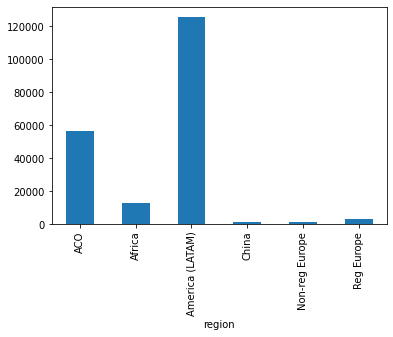

In [ ]:
# check how many deals are in each region
df.groupby('region')['user_id'].count().plot.bar();

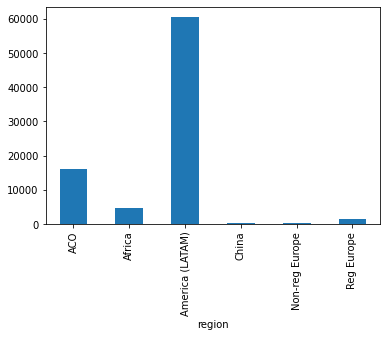

In [ ]:
# check how many users are in each region
df.groupby('region')['user_id'].nunique().plot.bar();

In [ ]:
# count average activity by regions (total amount of deals / total amount of unique users)
d = df.groupby('region')['user_id'].agg(['count', 'nunique'])
d['deals_per_user'] = d['count'] / d['nunique']
d

,count,nunique,deals_per_user
region,,,
ACO,56507,16229,3.481853
Africa,12579,4786,2.628291
America (LATAM),125532,60516,2.074360
China,1246,200,6.230000
Non-reg Europe,1138,302,3.768212
Reg Europe,2998,1490,2.012081


Here's the **first insight** - vast magority of users come from America (LATAM) region but they are not so active, while users from China are 1.5 times more active but 600 less in quantity.

In [ ]:
# check which insturment types are used in different regions + their profitability
d1 = df.groupby(['region', 'instrument_type']).agg({'user_id' : 'count', 'pnl' : 'sum'})
d1['average profitability'] = d1['pnl'] / d1['user_id']
d1

user_id           pnl  average profitability
region          instrument_type                                              
ACO             cfd                 1102  40185.602750              36.466064
                crypto               307  -8043.085750             -26.198976
                digital-option     50542 -52665.073683              -1.042006
                forex               4556 -11573.423228              -2.540260
Africa          cfd                  561  -2284.858577              -4.072832
                crypto               161   -299.340998              -1.859261
                digital-option     10323  -6000.789925              -0.581303
                forex               1534  -1669.698830              -1.088461
America (LATAM) cfd                 1705  -5449.562533              -3.196224
                crypto               280  -2829.395943             -10.104986
                digital-option    117111 -64271.458910              -0.548808
                forex               6436   -197.932887              -0.030754
China           cfd                    5      4.534198               0.906840
                digital-option      1206    394.984320               0.327516
                forex                 35  -1033.668637             -29.533390
Non-reg Europe  cfd                  159  -2951.436795             -18.562496
                crypto                16     55.225020               3.451564
                digital-option       805  -2716.098447              -3.374035
                forex                158    648.456275               4.104154
Reg Europe      cfd                  758  -2879.883768              -3.799319
                crypto                76 -33524.632802            -441.113589
                digital-option       389  -3570.910635              -9.179719
                forex               1384  -3412.959900              -2.466011
                fx-option            391  -1787.165257              -4.570755

**Insight 2** - in all regions digital options are the most used instrument, except Reg Europe, where forex is used the most.

**Insight 3** - regions differ in instruments profitability, for instance, cfd is unprofitable (negative pnl) in 4 regions and profitable (positive pnl) in 2 regions. Crypto stands out in Reg Europe because it is extremely unprofitable in this region.

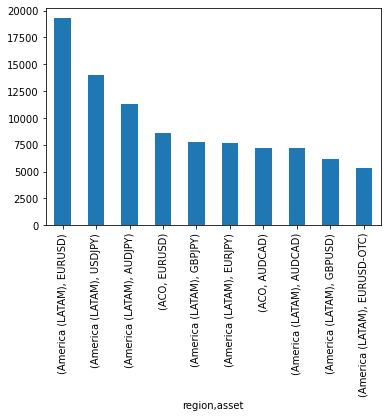

In [ ]:
# check what are the most popular and the most profitable assets by region
d2 = df.groupby(['region', 'asset']).agg({'user_id' : 'count', 'pnl' : 'sum'})
d2['average_profitability'] = d2['pnl'] / d2['user_id']
d2['user_id'].nlargest(10).plot.bar();

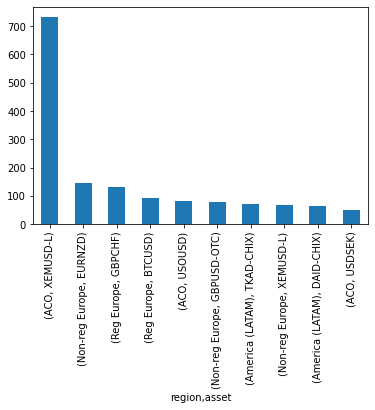

In [ ]:
d2['average_profitability'].nlargest(10).plot.bar();

**Insight 4** - the most used assets and the most profitable assets are different. Also America (LATAM) and ACO are two regions that make deals the most, while top-10 assets by profitability are also in Reg Europe.

In [ ]:
# check when users from different regions have registered
df['user_registration_year'] = df['user_registration_time'].dt.year
df.drop_duplicates(['user_id']).groupby(['region', 'user_registration_year']). \
  agg(users_registered=('user_registration_year', 'count'))

users_registered
region          user_registration_year                  
ACO             2013                                   1
                2014                                  48
                2015                                 205
                2016                                 653
                2017                                2022
                2018                                1723
                2019                                3756
                2020                                7821
Africa          2014                                   1
                2015                                  23
                2016                                 248
                2017                                 553
                2018                                 489
                2019                                1037
                2020                                2435
America (LATAM) 2014                                  39
                2015                                 178
                2016                                 947
                2017                                2283
                2018                                2997
                2019                               14151
                2020                               39921
China           2015                                   1
                2016                                   4
                2017                                  25
                2018                                  33
                2019                                  71
                2020                                  66
Non-reg Europe  2015                                  12
                2016                                  23
                2017                                  62
                2018                                  38
                2019                                  35
                2020                                 132
Reg Europe      2014                                  10
                2015                                  47
                2016                                 174
                2017                                 268
                2018                                 180
                2019                                 204
                2020                                 607

**Insight 5** - in magority of regions trading platform becomes more popular with time because the amount of registrations is gradually increasing. However, in China registration peak was in 2019 and in 2020 the amount of registrations is decreasing. Also the rate at which the platform is gaining popularity varies by region, with the fastest new users growth in America (LATAM), ACO and Africa and the slowest growth in China, Non-reg Europe and Reg Europe.

In [ ]:
# check at what day of week users create deals in different regions
df['deal_create_weekday'] = df['deal_create_time'].dt.day_name()
df.groupby(['region', 'deal_create_weekday'])['deal_create_weekday'].count()

region           deal_create_weekday
ACO              Friday                  5508
                 Monday                 10462
                 Saturday                6523
                 Sunday                  8918
                 Thursday                7615
                 Tuesday                10068
                 Wednesday               7413
Africa           Friday                  1176
                 Monday                  2542
                 Saturday                1417
                 Sunday                  1586
                 Thursday                1455
                 Tuesday                 2598
                 Wednesday               1805
America (LATAM)  Friday                 21983
                 Monday                 16722
                 Saturday               11374
                 Sunday                 16575
                 Thursday               17137
                 Tuesday                18399
                 Wednesday              233

**Insight 6** - overall Monday and Tuesday are the most popular days to create deals. America (LATAM) differs because there more deals are created at Wednesday and Friday. 

In [ ]:
# check at what day of week users close deals in different regions
df['deal_close_weekday'] = df['deal_close_time'].dt.day_name()
df.groupby(['region', 'deal_close_weekday'])['deal_close_weekday'].count()

region           deal_close_weekday
ACO              Friday                 5570
                 Monday                10412
                 Saturday               6513
                 Sunday                 8912
                 Thursday               7530
                 Tuesday               10212
                 Wednesday              7358
Africa           Friday                 1212
                 Monday                 2465
                 Saturday               1411
                 Sunday                 1589
                 Thursday               1454
                 Tuesday                2682
                 Wednesday              1766
America (LATAM)  Friday                22073
                 Monday                16650
                 Saturday              11371
                 Sunday                16558
                 Thursday              17041
                 Tuesday               18555
                 Wednesday             23284
China            Fr

**Insight 7** - with the closure of deals there is the same situation as with creation: in America (LATAM) the most deals are closed at Wednesday and Friday, in other regions at Monday and Tuesday.

In [ ]:
# check correlation between deals creature and slosure weekdays by regions
df.groupby(['region', 'deal_close_weekday'])['deal_close_weekday'].count(). \
  corr(df.groupby(['region', 'deal_create_weekday'])['deal_create_weekday'].count())

0.9999664692231046

## **Behavior differences depending on platform**

Steps for comparison are the same as in grouping by region

In [ ]:
# look at unique platforms
df.deal_platform.unique()

array(['Android', 'Web', 'iOS', 'Web_mobile'], dtype=object)

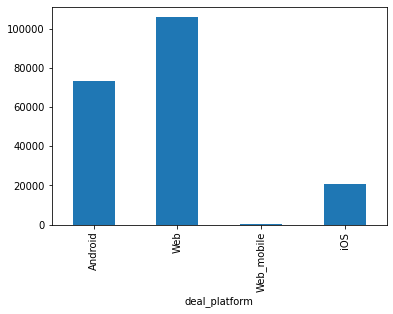

In [ ]:
# check how many deals are made with each platform
df.groupby('deal_platform')['user_id'].count().plot.bar();

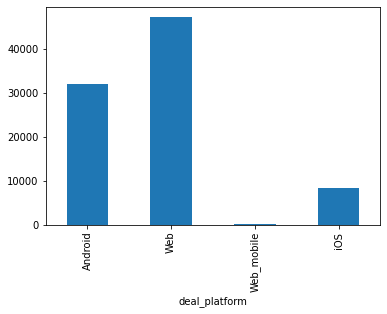

In [ ]:
# check how many users use each platform
df.groupby('deal_platform')['user_id'].nunique().plot.bar();

In [ ]:
# count average activity by platforms (total amount of deals / total amount of unique users)
d3 = df.groupby('deal_platform')['user_id'].agg(['count', 'nunique'])
d3['deals_per_user'] = d3['count'] / d3['nunique']
d3

,count,nunique,deals_per_user
deal_platform,,,
Android,73333,31910,2.298120
Web,105908,47140,2.246669
Web_mobile,81,54,1.500000
iOS,20678,8350,2.476407


**Insight 8** - the least used platform is web_mobile. The most used platform is web (desktop, I assume). And the most active users are with iOS (application, probably) because average amount of deals per user is the highest in this platform. 

In [ ]:
# check which insturment types are used with different platforms + their profitability
d4 = df.groupby(['deal_platform', 'instrument_type']).agg({'user_id' : 'count', 'pnl' : 'sum'})
d4['average profitability'] = d4['pnl'] / d4['user_id']
d4

user_id           pnl  average profitability
deal_platform instrument_type                                              
Android       cfd                 1296  -5049.459162              -3.896188
              crypto               470   2110.312588               4.490027
              digital-option     67723 -36581.530278              -0.540164
              forex               3733 -16648.600753              -4.459845
              fx-option            111  -3147.148530             -28.352689
Web           cfd                 2454  34760.957587              14.165019
              crypto               237 -43317.356285            -182.773655
              digital-option     93800 -60630.229295              -0.646378
              forex               9181   -362.791918              -0.039516
              fx-option            236   2611.591690              11.066066
Web_mobile    digital-option        81   1268.648283              15.662324
iOS           cfd                  540  -3087.103150              -5.716858
              crypto               133  -3434.186777             -25.820953
              digital-option     18772 -32886.235990              -1.751877
              forex               1189   -227.834535              -0.191619
              fx-option             44  -1251.608417             -28.445646

**Insight 9** - the most popular instrument among all platforms are digital options (that's interesting that with web_mobile only digital options are dealed). But profitability of instrumnets differs among platforms: with Android crypto is the most profitable, with web the most profitable is cfd, and crypto here is extremely unprofitable, with iOS all instruments are unprofitable (negative pnl).

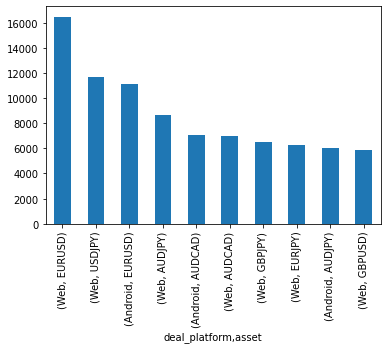

In [ ]:
# check what are the most popular and the most profitable assets by platform
d5 = df.groupby(['deal_platform', 'asset']).agg({'user_id' : 'count', 'pnl' : 'sum'})
d5['average_profitability'] = d5['pnl'] / d5['user_id']
d5['user_id'].nlargest(10).plot.bar();

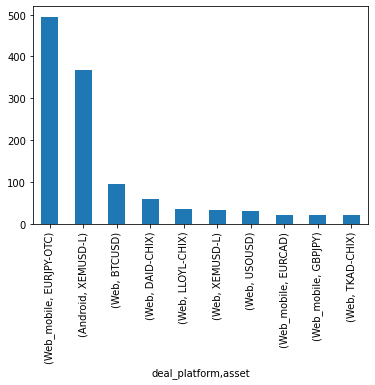

In [ ]:
d5['average_profitability'].nlargest(10).plot.bar();

**Insight 10** - the most used assets and the most profitable assets are different. Android and Web are two platforms which are used the most, while most profitable asset is dealed with web_mobile.

In [ ]:
# check when users have registered on dofferent platforms
df.drop_duplicates(['user_id']).groupby(['deal_platform', 'user_registration_year'])['user_registration_year'].count()

deal_platform  user_registration_year
Android        2013                          1
               2014                         38
               2015                        150
               2016                        765
               2017                       2192
               2018                       2164
               2019                       6557
               2020                      18540
Web            2014                         46
               2015                        268
               2016                       1073
               2017                       2491
               2018                       2888
               2019                      11316
               2020                      27267
Web_mobile     2017                          3
               2018                          6
               2019                         14
               2020                         22
iOS            2014                         14
               2015   

**Insight 11** - among all platgorms there is an increase of users. However, the sharpness of growth is different - the most fast increase is in Web and Android, the slowest growth is in Web_mobile.

In [ ]:
# check at what day of week users create deals with different platforms
df.groupby(['deal_platform', 'deal_create_weekday'])['deal_create_weekday'].count()

deal_platform  deal_create_weekday
Android        Friday                  9118
               Monday                 11108
               Saturday                8679
               Sunday                 12374
               Thursday                9062
               Tuesday                11741
               Wednesday              11251
Web            Friday                 17839
               Monday                 16478
               Saturday                8361
               Sunday                 11542
               Thursday               15478
               Tuesday                17089
               Wednesday              19121
Web_mobile     Friday                     9
               Monday                    11
               Saturday                  10
               Sunday                    13
               Thursday                  12
               Tuesday                    8
               Wednesday                 18
iOS            Friday                  23

**Insight 12** - deals creature activity differs by platforms, however, difference is not as big as it was with grouping by region.

In [ ]:
# check at what day of week users close deals with different platforms
df.groupby(['deal_platform', 'deal_close_weekday'])['deal_close_weekday'].count()

deal_platform  deal_close_weekday
Android        Friday                 9181
               Monday                11037
               Saturday               8659
               Sunday                12363
               Thursday               8984
               Tuesday               11921
               Wednesday             11188
Web            Friday                17888
               Monday                16325
               Saturday               8358
               Sunday                11534
               Thursday              15400
               Tuesday               17394
               Wednesday             19009
Web_mobile     Friday                    9
               Monday                   11
               Saturday                 10
               Sunday                   13
               Thursday                 12
               Tuesday                   8
               Wednesday                18
iOS            Friday                 2436
               Monda

**Insight 13** - for deals closure there is the same situation as with creature: weekdays of deals closure differ among platforms.

In [ ]:
# check correlation between deals creature and closure weekdays by regions
df.groupby(['deal_platform', 'deal_close_weekday'])['deal_close_weekday'].count(). \
  corr(df.groupby(['deal_platform', 'deal_create_weekday'])['deal_create_weekday'].count())

0.9999119569096897

## **Users segmentation**

I've decided to use **RFM segmentation**.

According to this approach we evaluate users based in 3 cretarion:

*   *Recency* - time elapsed since the last user activity
*   *Frequency* of user activities
*   *Monetary* - money turnover per user

For each criterion users are assigned a raring, for simplicity I will make a rating from 1 to 3 (1 is for best evaluation and 2 for the worst). Then we attach three ratings together and get the final user rating. For example, 111 are ideal users who make a lot of actions on the platform, the last action was made recently and they have a high cash turnover. On the other hand, 333 are the worst users who are not active at all, made thay last activity too long ago and they cash turnover is too small (they can be those users who registered but didn't create or close any deals). 

In [ ]:
# for recencry criteria I used last deal close time
# for frequency criteria I used total amount of deals closed by user
# for monetary criteria I used the sum of absolute pnl of each user

ds = df.groupby('user_id', as_index=False).agg(deal_close_time_max=('deal_close_time', 'max'),
                                                amount_of_deals=('user_id', 'count'),
                                                cash_turnover=('pnl', lambda x: sum(abs(x))))
ds

,user_id,deal_close_time_max,amount_of_deals,cash_turnover
0,2070,2020-05-25 09:35:02,2,29.433170
1,337946,2020-06-05 08:38:03,17,25.596337
2,360923,2020-06-05 08:38:02,16,27.094058
3,449611,2020-05-25 12:05:06,9,22.447055
4,818646,2020-05-24 10:48:02,8,18.007657
...,...,...,...,...
83518,540147279,2020-06-09 06:05:47,1,0.029528
83519,540155958,2020-06-09 06:02:03,1,0.568262
83520,540172840,2020-06-09 06:12:02,2,2.805085
83521,540629789,2020-06-10 05:24:04,1,0.576565


In [ ]:
# lets first remove outliers
import numpy as np
from scipy import stats

ds = ds[(np.abs(stats.zscore(ds[['amount_of_deals', 'cash_turnover']])) < 3).all(axis=1)]

In [ ]:
# now let's give users rating from 1 to 3 on each criterion
# and at the same time assign some description to each rating in order managers to be able to understand what this rating mean
#recency_d = {1 : 'Fans', 2 : 'Average', 3: 'Lost'}
#frequency_d = {1 : 'Active', 2 : 'Average', 3: 'Passive'}
#monetary_d = {1 : 'BigSpender', 2 : 'Average', 3: 'Poor'}

import os
import warnings
warnings.filterwarnings('ignore')

third_1_r = min(ds.deal_close_time_max) + (max(ds.deal_close_time_max) - min(ds.deal_close_time_max)) / 3
third_2_r = min(ds.deal_close_time_max) + (max(ds.deal_close_time_max) - min(ds.deal_close_time_max)) / 3 * 2
ds['recency'] = ds.deal_close_time_max.map(lambda x: 'Fan' if x <= third_1_r else 'Average' if x <= third_2_r else 'Lost')

third_1_f = min(ds.amount_of_deals) + (max(ds.amount_of_deals) - min(ds.amount_of_deals)) / 3
third_2_f = min(ds.amount_of_deals) + (max(ds.amount_of_deals) - min(ds.amount_of_deals)) / 3 * 2
ds['frequency'] = ds.amount_of_deals.map(lambda x: 'Active' if x > third_2_f else 'Average' if x >= third_1_f else 'Passive')

third_1_m = min(ds.cash_turnover) + (max(ds.cash_turnover) - min(ds.cash_turnover)) / 3
third_2_m = min(ds.cash_turnover) + (max(ds.cash_turnover) - min(ds.cash_turnover)) / 3 * 2
ds['monetary'] = ds.cash_turnover.map(lambda x: 'BigSpender' if x > third_2_m else 'Average' if x >= third_1_m else 'Poor')

ds

,user_id,deal_close_time_max,amount_of_deals,cash_turnover,recency,frequency,monetary
0,2070,2020-05-25 09:35:02,2,29.433170,Average,Passive,Poor
1,337946,2020-06-05 08:38:03,17,25.596337,Lost,Average,Poor
2,360923,2020-06-05 08:38:02,16,27.094058,Lost,Average,Poor
3,449611,2020-05-25 12:05:06,9,22.447055,Average,Passive,Poor
4,818646,2020-05-24 10:48:02,8,18.007657,Average,Passive,Poor
...,...,...,...,...,...,...,...
83518,540147279,2020-06-09 06:05:47,1,0.029528,Lost,Passive,Poor
83519,540155958,2020-06-09 06:02:03,1,0.568262,Lost,Passive,Poor
83520,540172840,2020-06-09 06:12:02,2,2.805085,Lost,Passive,Poor
83521,540629789,2020-06-10 05:24:04,1,0.576565,Lost,Passive,Poor


Here we see that there are for example Lost Passive Poor user, which means that he is not interesting for us because he has closed his last deal too long ago, closed not many deals and his deals turnover was small. 

In [ ]:
# let's look how many users have different ratings by criterion
print(ds.groupby('recency').user_id.count())
print('\n')
print(ds.groupby('frequency').user_id.count())
print('\n')
print(ds.groupby('monetary').user_id.count())

recency
Average    35950
Fans       31675
Lost       15564
Name: user_id, dtype: int64


frequency
Active       116
Average      629
Passive    82444
Name: user_id, dtype: int64


monetary
Average         452
BigSpender      140
Poor          82597
Name: user_id, dtype: int64


In [ ]:
ds.query('monetary == "BigSpender"')

,user_id,deal_close_time_max,amount_of_deals,cash_turnover,recency,frequency,monetary
292,24499615,2020-06-09 06:11:02,6,622.619580,Lost,Passive,BigSpender
345,29466971,2020-05-28 08:01:02,2,723.716567,Average,Passive,BigSpender
465,48819593,2020-06-02 09:22:25,22,712.375733,Lost,Average,BigSpender
1021,78622042,2020-05-25 11:50:04,3,610.508062,Average,Passive,BigSpender
1400,89814762,2020-05-26 10:15:08,9,760.540060,Average,Passive,BigSpender
...,...,...,...,...,...,...,...
74204,519299573,2020-05-15 14:21:59,1,552.727663,Fan,Passive,BigSpender
74961,520141741,2020-05-27 05:00:05,3,722.886920,Average,Passive,BigSpender
80316,527649240,2020-05-23 10:24:58,2,652.728292,Average,Passive,BigSpender
80815,528515336,2020-05-24 11:07:38,9,705.622567,Average,Passive,BigSpender


Here I've sorted BigSpenders, whose deals turnover is high. For instance, user with id 74204 is a Fan, which means that he has closed his last deal recently. But he is passive - closes not so many deals. Managers can use some promotions in order to push him make more deals on the platform. 

## **Results of last 3 months**

In [ ]:
# let's first understand which months we need to analise
max(df.user_registration_time.max(), df.deal_create_time.max(), df.deal_close_time.max())
# max date in dataframe is 2020-06-11, so we will look at the period April-June 2020 despite June is not full

Timestamp('2020-06-11 04:55:05')

In [ ]:
# how many users registered at the platform for last 3 months
df.query("user_registration_time.dt.year == 2020 & user_registration_time.dt.month >= 4").user_id.nunique()

32553

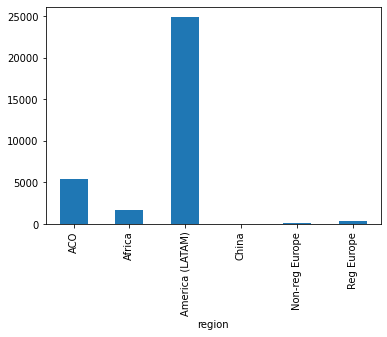

In [ ]:
# how many users registered for last 3 months form different regions
df.query("user_registration_time.dt.year == 2020 & user_registration_time.dt.month >= 4"). \
  groupby('region').user_id.nunique().plot.bar();

In [ ]:
# how many deals were created for last 3 months
df.query("deal_create_time.dt.year == 2020 & deal_create_time.dt.month >= 4").shape[0]

199968

In [ ]:
# how many deals were closed for last 3 months
df.query("deal_close_time.dt.year == 2020 & deal_close_time.dt.month >= 4").shape[0]

200000

The amount of closed deals for last 3 months probably because users have closed the deals, which were created before 2020-April-01

In [ ]:
# how many deals were created and closed in different regions
print("The amount of created deals for last 3 months by region:\n")
print(df.query("deal_create_time.dt.year == 2020 & deal_create_time.dt.month >= 4").groupby('region').user_id.count())
print("\nThe amount of closed deals for last 3 months by region\n")
print(df.query("deal_close_time.dt.year == 2020 & deal_close_time.dt.month >= 4").groupby('region').user_id.count())

The amount of created deals for last 3 months by region:

region
ACO                 56495
Africa              12579
America (LATAM)    125529
China                1246
Non-reg Europe       1136
Reg Europe           2983
Name: user_id, dtype: int64

The amount of closed deals for last 3 months by region

region
ACO                 56507
Africa              12579
America (LATAM)    125532
China                1246
Non-reg Europe       1138
Reg Europe           2998
Name: user_id, dtype: int64


In [ ]:
# how many deals were created and closed with different platforms
print("The amount of created deals for last 3 months by platform:\n")
print(df.query("deal_create_time.dt.year == 2020 & deal_create_time.dt.month >= 4").groupby('deal_platform').user_id.count())
print("\nThe amount of closed deals for last 3 months by platform\n")
print(df.query("deal_close_time.dt.year == 2020 & deal_close_time.dt.month >= 4").groupby('deal_platform').user_id.count())

The amount of created deals for last 3 months by platform:

deal_platform
Android        73324
Web           105902
Web_mobile        81
iOS            20661
Name: user_id, dtype: int64

The amount of closed deals for last 3 months by platform

deal_platform
Android        73333
Web           105908
Web_mobile        81
iOS            20678
Name: user_id, dtype: int64


In [ ]:
# what is the total pnl for last 3 months
df.query("deal_close_time.dt.year == 2020 & deal_close_time.dt.month >= 4").pnl.sum()

-165872.57494166665

In [ ]:
# what is average pnl per deal for last 3 months
(df.query("deal_close_time.dt.year == 2020 & deal_close_time.dt.month >= 4").pnl.sum()
  / df.query("deal_close_time.dt.year == 2020 & deal_close_time.dt.month >= 4").user_id.count())

-0.8293628747083333

In [ ]:
# average amount of deals closed per user for last 3 months
(df.query("deal_close_time.dt.year == 2020 & deal_close_time.dt.month >= 4").shape[0]
  / df.query("deal_close_time.dt.year == 2020 & deal_close_time.dt.month >= 4").user_id.nunique())

2.3945500041904624

## **Results for 11 days of June 2020**

In [ ]:
# how many users registered at the platform in June 2020
df.query('user_registration_time.dt.year == 2020 & user_registration_time.dt.month == 6').user_id.nunique()

693

In [ ]:
# check if the amount of new users in June 2020 is bigger than in May 2020 (only compare first 11 days)
time_max_june = df.query('user_registration_time.dt.year == 2020 & user_registration_time.dt.month == 6').user_registration_time.dt.time.max()
(df.query('user_registration_time.dt.year == 2020 & user_registration_time.dt.month == 6').user_id.nunique()
  - df.query('user_registration_time.dt.year == 2020 & user_registration_time.dt.month == 5 & user_registration_time.dt.day <= 11 & user_registration_time.dt.time <= @time_max_june').user_id.nunique())

-6839

For first 11 days of June 2020 6839 users less registered at the platform than for first 11 days of May 2020

In [ ]:
# check if the amount of new users in June 2020 is bigger than in April 2020 (only compare first 11 days)
time_max_june = df.query('user_registration_time.dt.year == 2020 & user_registration_time.dt.month == 6').user_registration_time.dt.time.max()
(df.query('user_registration_time.dt.year == 2020 & user_registration_time.dt.month == 6').user_id.nunique()
  - df.query('user_registration_time.dt.year == 2020 & user_registration_time.dt.month == 4 & user_registration_time.dt.day <= 11 & user_registration_time.dt.time <= @time_max_june').user_id.nunique())

-4148

In comparison with April 2020 June also loses in terms of registrations number

In [ ]:
# ckeck the amount of deals created in June
df.query('deal_create_time.dt.year == 2020 & deal_create_time.dt.month == 6').shape[0]

22170

In [ ]:
# check if the amount of deals created in June 2020 is bigger than in May 2020 (only compare first 11 days)
time_max_june = df.query('deal_create_time.dt.year == 2020 & deal_create_time.dt.month == 6').deal_create_time.dt.time.max()
(df.query('deal_create_time.dt.year == 2020 & deal_create_time.dt.month == 6').shape[0]
  - df.query('deal_create_time.dt.year == 2020 & deal_create_time.dt.month == 5 & deal_create_time.dt.day <= 11 & deal_create_time.dt.time <= @time_max_june').shape[0])

3309

The amount of deals created in June 2020 is 3309 higher that in May 2020

In [ ]:
# ckeck the average amount of deals created per user in June 2020
(df.query('deal_create_time.dt.year == 2020 & deal_create_time.dt.month == 6').shape[0] / 
  df.query('deal_create_time.dt.year == 2020 & deal_create_time.dt.month == 6').user_id.nunique())

1.5835714285714286

In [ ]:
# ckeck if the average amount of deals created per user in June 2020 is higher than in May 2020(only compare first 11 days)
time_max_june = df.query('deal_create_time.dt.year == 2020 & deal_create_time.dt.month == 6').deal_create_time.dt.time.max()
((df.query('deal_create_time.dt.year == 2020 & deal_create_time.dt.month == 6').shape[0] / 
  df.query('deal_create_time.dt.year == 2020 & deal_create_time.dt.month == 6').user_id.nunique()) - 
 (df.query('deal_create_time.dt.year == 2020 & deal_create_time.dt.month == 5 & deal_create_time.dt.day <= 11 & deal_create_time.dt.time <= @time_max_june').shape[0] / 
  df.query('deal_create_time.dt.year == 2020 & deal_create_time.dt.month == 5 & deal_create_time.dt.day <= 11 & deal_create_time.dt.time <= @time_max_june').user_id.nunique()))

-0.14663680920492217

Average activity (amount of deals created per user) decreased in June 2020 in comparison with May 2020

In [ ]:
# ckeck the amount of deals closed in June
df.query('deal_close_time.dt.year == 2020 & deal_close_time.dt.month == 6').shape[0]

22315

In [ ]:
# check if the amount of deals closed in June 2020 is bigger than in May 2020 (only compare first 11 days)
time_max_june = df.query('deal_close_time.dt.year == 2020 & deal_close_time.dt.month == 6').deal_close_time.dt.time.max()
(df.query('deal_close_time.dt.year == 2020 & deal_close_time.dt.month == 6').shape[0]
  - df.query('deal_close_time.dt.year == 2020 & deal_close_time.dt.month == 5 & deal_close_time.dt.day <= 11 & deal_close_time.dt.time <= @time_max_june').shape[0])

3780

The amount of deals closed in June 2020 is 3780 higher that in May 2020

In [ ]:
# ckeck the average amount of deals closed per user in June 2020
(df.query('deal_close_time.dt.year == 2020 & deal_close_time.dt.month == 6').shape[0] / 
  df.query('deal_close_time.dt.year == 2020 & deal_close_time.dt.month == 6').user_id.nunique())

1.582960913669575

In [ ]:
# ckeck if the average amount of deals closed per user in June 2020 is higher than in May 2020(only compare first 11 days)
time_max_june = df.query('deal_close_time.dt.year == 2020 & deal_close_time.dt.month == 6').deal_close_time.dt.time.max()
((df.query('deal_close_time.dt.year == 2020 & deal_close_time.dt.month == 6').shape[0] / 
  df.query('deal_close_time.dt.year == 2020 & deal_close_time.dt.month == 6').user_id.nunique()) - 
 (df.query('deal_close_time.dt.year == 2020 & deal_close_time.dt.month == 5 & deal_close_time.dt.day <= 11 & deal_close_time.dt.time <= @time_max_june').shape[0] / 
  df.query('deal_close_time.dt.year == 2020 & deal_close_time.dt.month == 5 & deal_close_time.dt.day <= 11 & deal_close_time.dt.time <= @time_max_june').user_id.nunique()))

-0.1549668875493655

Average activity (amount of deals closed per user) decreased in June 2020 in comparison with May 2020

In [ ]:
# average pnl per deal in June 2020
(df.query('deal_close_time.dt.year == 2020 & deal_close_time.dt.month == 6').pnl.sum() /
 df.query('deal_close_time.dt.year == 2020 & deal_close_time.dt.month == 6').shape[0])

-1.1119528095451487

In [ ]:
# compare average pnl per deal in June 2020 and May 2020
time_max_june = df.query('deal_close_time.dt.year == 2020 & deal_close_time.dt.month == 6').deal_close_time.dt.time.max()
print("Average pnl per deal in June 2020:\n")
print(df.query('deal_close_time.dt.year == 2020 & deal_close_time.dt.month == 6').pnl.sum() /
 df.query('deal_close_time.dt.year == 2020 & deal_close_time.dt.month == 6').shape[0])
print('\nAverage pnl per deal in May 2020:\n')
print(df.query('deal_close_time.dt.year == 2020 & deal_close_time.dt.month == 5 & deal_close_time.dt.day <= 11 & deal_close_time.dt.time <= @time_max_june').pnl.sum() /
 df.query('deal_close_time.dt.year == 2020 & deal_close_time.dt.month == 5 & deal_close_time.dt.day <= 11 & deal_close_time.dt.time <= @time_max_june').shape[0])

Average pnl per deal in June 2020:

-1.1119528095451487

Average pnl per deal in May 2020:

-0.7494900557503821


Average pnl per deal decreased in June 2020 in comparison with May 2020